## Observations and Insights 

In [13]:
%matplotlib inline

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Checking the number of mice.
len(combined_mouse_data["Mouse ID"].unique())

249

In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [17]:
# Optional: Get all the data for the duplicate mouse ID. 




In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = combined_mouse_data[combined_mouse_data['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())




248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)']
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
clean_study_data_complete.groupby('Drug Regimen')[['Tumor Volume (mm3)']].mean()

means = clean_study_data_complete.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
means_df = clean_study_data_complete.groupby('Drug Regimen')[['Tumor Volume (mm3)']].mean()
means_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [21]:
medians = clean_study_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
median_df = clean_study_data_complete.groupby('Drug Regimen')[['Tumor Volume (mm3)']].median()
median_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [22]:
variances = clean_study_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
variance_df = clean_study_data_complete.groupby('Drug Regimen')[['Tumor Volume (mm3)']].var()
variance_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [23]:
standard_deviations = clean_study_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
standard_deviation_df = clean_study_data_complete.groupby('Drug Regimen')[['Tumor Volume (mm3)']].std()
standard_deviation_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [24]:
standard_errors = clean_study_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
standard_error_df = clean_study_data_complete.groupby('Drug Regimen')[['Tumor Volume (mm3)']].sem()
standard_error_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Variance Tumor Volume":variances,
                              "Standard Deviation Tumor Volume":standard_deviations,
                             "Standard Error Tumor Volume":standard_errors})
                              

# Using the aggregation method, produce the same summary statistics in a single line
summary_table 

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<BarContainer object of 10 artists>

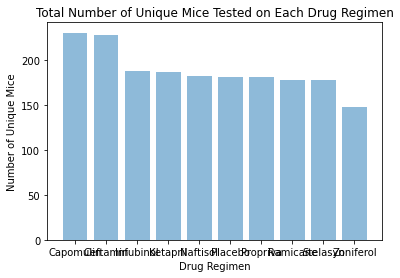

In [58]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_regimens = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
x_axis = np.arange(len(drug_regimens))
dr_counts = clean_study_data_complete['Drug Regimen'].value_counts()
DR_countlist = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.title("Total Number of Unique Mice Tested on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")
#unique_mice = clean_study_data_complete["Mouse ID"].unique()
#x_axis = np.arange(len(drug_regimens))

#my_counts.plot(kind="bar") 


plt.bar(x_axis, DR_countlist,alpha=0.5, align="center")

<AxesSubplot:title={'center':'Total Number of Unique Mice Tested on Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Unique Mice'>

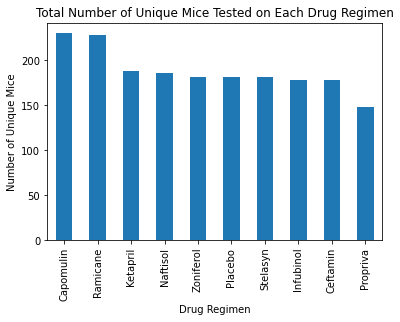

In [65]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.title("Total Number of Unique Mice Tested on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")
dr_counts.plot(kind="bar")

ValueError: 'label' must be of length 'x'

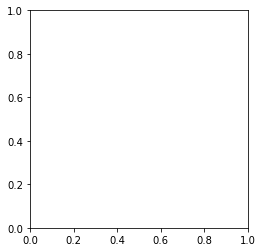

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexes = ["Male, Female"]
sex_counts = clean_study_data_complete['Sex'].value_counts()
MaleFemale_countlist = [958, 922]

plt.pie(MaleFemale_countlist,  labels=sexes)


In [64]:
my_counts = clean_study_data_complete['Drug Regimen'].value_counts()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [62]:
clean_study_data_complete['Sex'].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64